# ELAIS-N2 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
ae28a36 (Mon Jul 10 16:31:54 2017 +0100) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
#SUFFIX = "_20170710"

master_catalogue = Table.read("{}/master_catalogue_elais-n2{}.fits".format(OUT_DIR, SUFFIX))

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

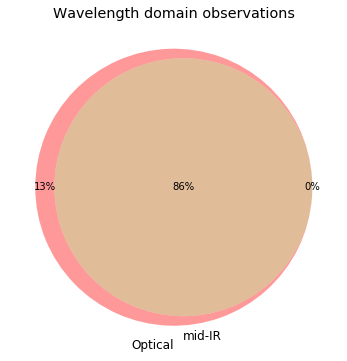

In [5]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 5)
    ],
    set_labels=('Optical', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

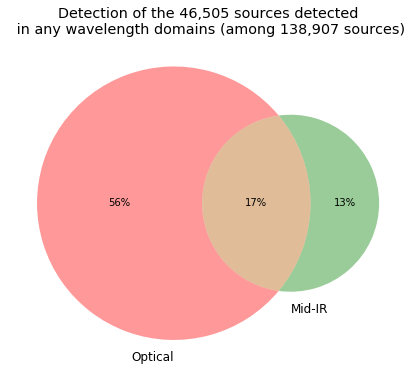

In [6]:
venn2(
    [
        np.sum(flag_det[flag_obs == 5] == 1),
        np.sum(flag_det[flag_obs == 5] == 4),
        np.sum(flag_det[flag_obs == 5] == 5)
    ],
    set_labels=('Optical', 'Mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["WFC u", "CFHT Megacam u"]
g_bands = ["WFC g", "CFHT Megacam g", "GPC1 g", "RCS g"]
r_bands = ["WFC r", "CFHT Megacam r", "GPC1 r", "RCS r"]
i_bands = ["WFC i",                   "GPC1 i", "RCS i"]
z_bands = ["WFC z", "CFHT Megacam z", "GPC1 z", "RCS z"]
y_bands = [                           "GPC1 y", "RCS y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

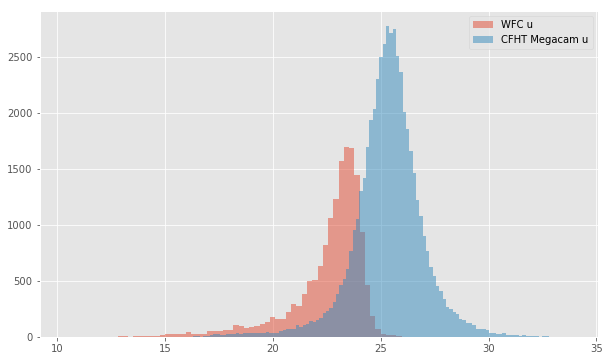

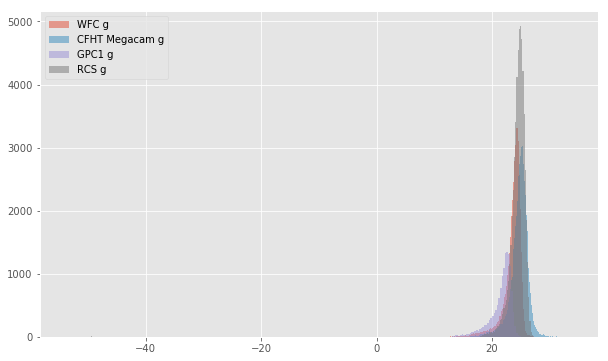

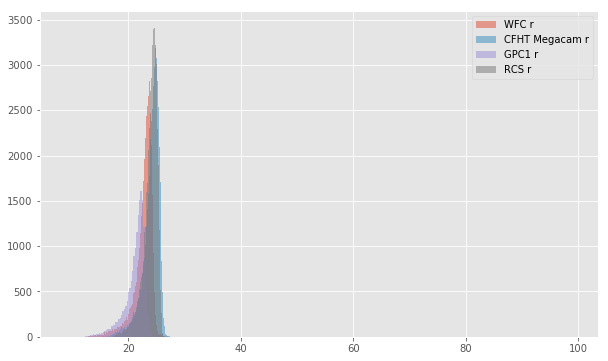

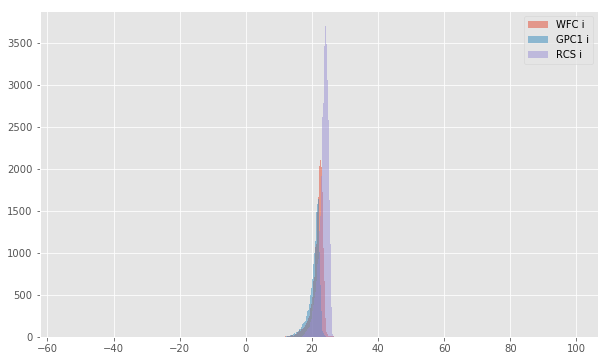

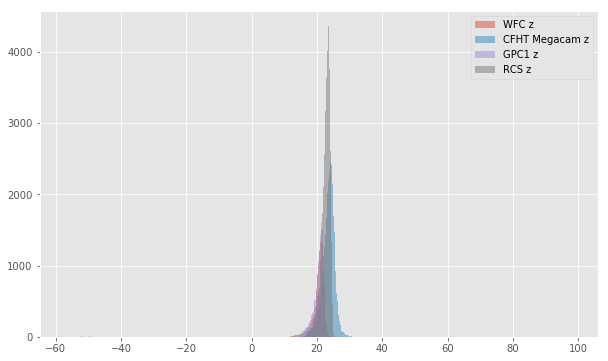

HELP warning: One or more of the columns is empty.


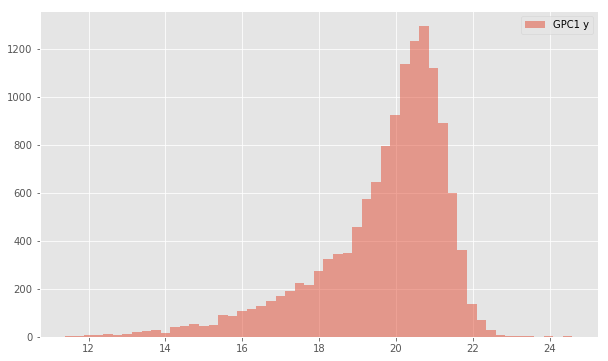

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

CFHT Megacam u (aperture) - WFC u (aperture):
- Median: 0.06
- Median Absolute Deviation: 0.27
- 1% percentile: -0.714999008178711
- 99% percentile: 3.7722917556762963


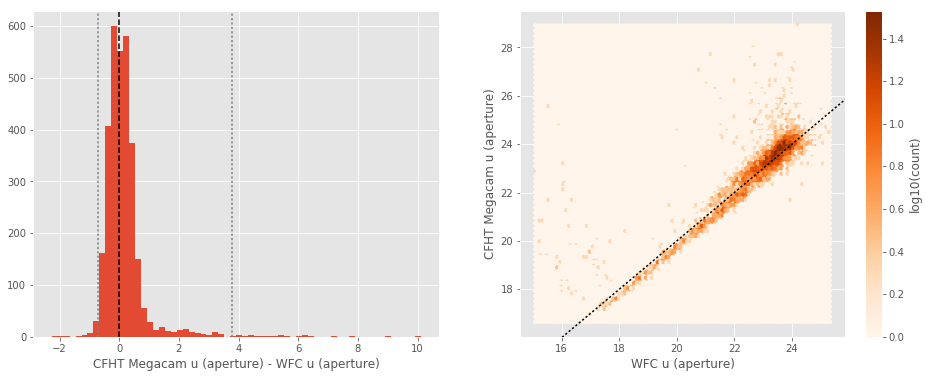

CFHT Megacam u (total) - WFC u (total):
- Median: -0.22
- Median Absolute Deviation: 0.22
- 1% percentile: -1.060940284729004
- 99% percentile: 3.1821101951599164


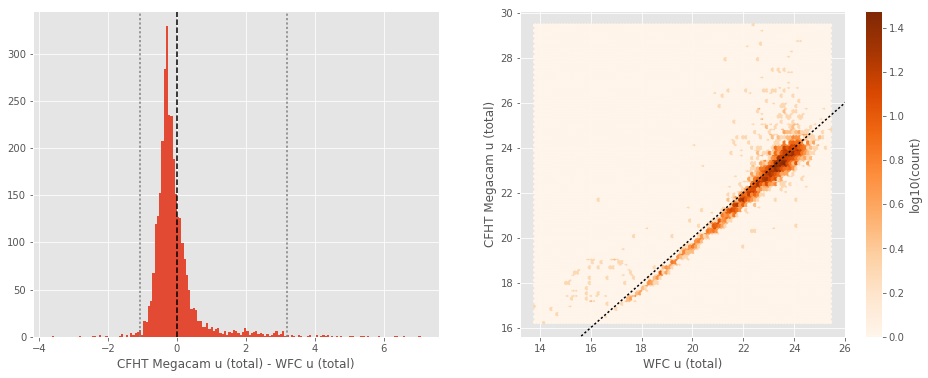

CFHT Megacam g (aperture) - WFC g (aperture):
- Median: -0.01
- Median Absolute Deviation: 0.16
- 1% percentile: -0.7999117279052734
- 99% percentile: 1.1106660461425815


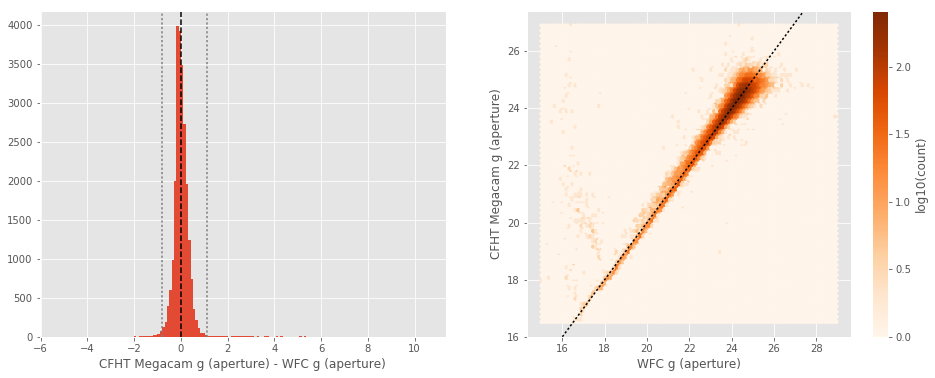

CFHT Megacam g (total) - WFC g (total):
- Median: -0.07
- Median Absolute Deviation: 0.16
- 1% percentile: -1.1380558967590333
- 99% percentile: 2.0397975921630778


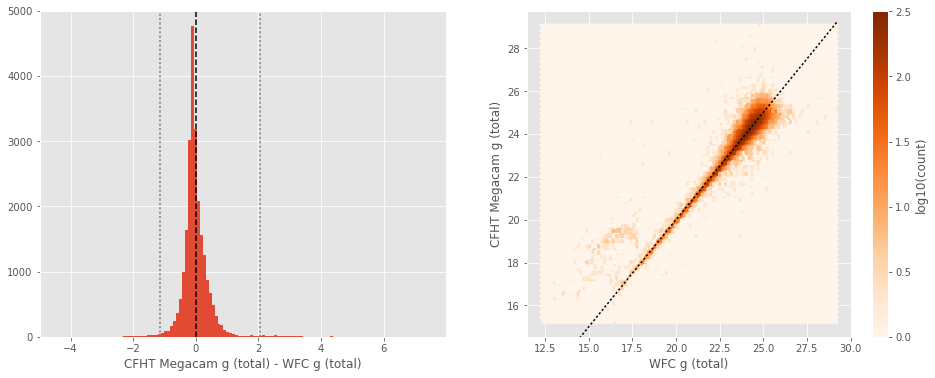

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.21
- 1% percentile: -1.4650848960876464
- 99% percentile: 2.351793956756592


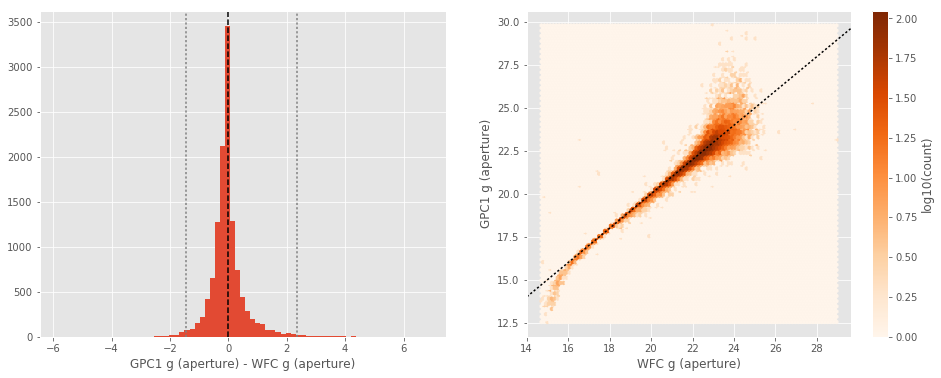

GPC1 g (total) - WFC g (total):
- Median: 0.01
- Median Absolute Deviation: 0.13
- 1% percentile: -1.276540241241455
- 99% percentile: 0.8664400100708022


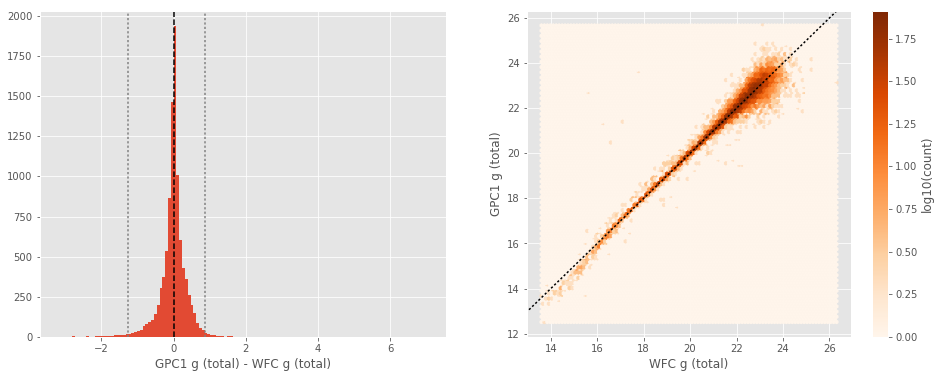

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No aperture magnitudes in one or both bands.
RCS g (total) - WFC g (total):
- Median: -0.07
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1783054733276366
- 99% percentile: 1.2569428443908688


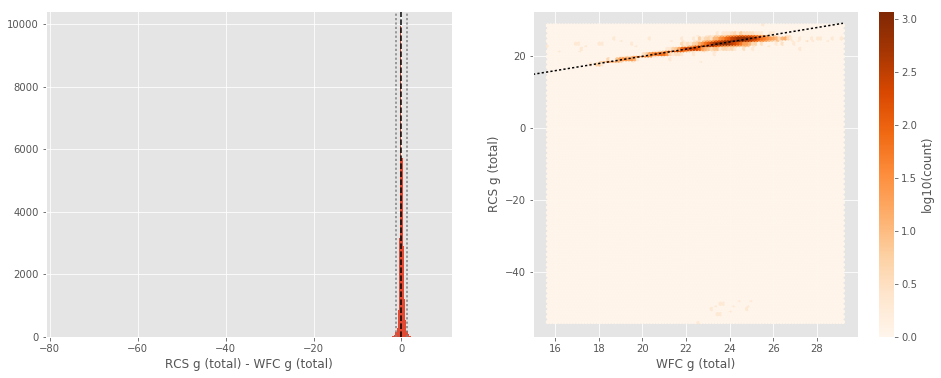

GPC1 g (aperture) - CFHT Megacam g (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.29
- 1% percentile: -3.72856201171875
- 99% percentile: 2.4124911499023414


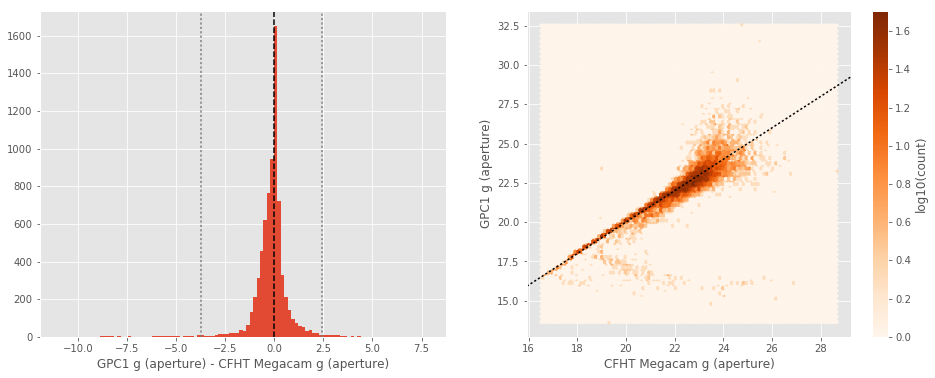

GPC1 g (total) - CFHT Megacam g (total):
- Median: 0.09
- Median Absolute Deviation: 0.13
- 1% percentile: -3.2904091739654544
- 99% percentile: 0.8970695304870641


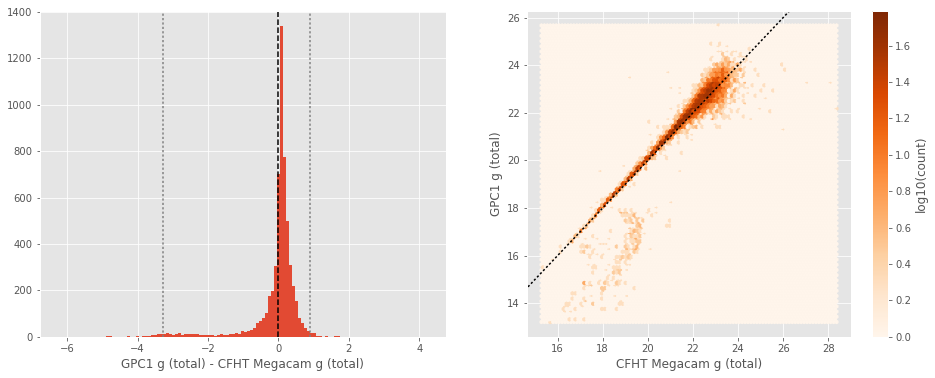

No aperture magnitudes in one or both bands.
RCS g (total) - CFHT Megacam g (total):
- Median: 0.00
- Median Absolute Deviation: 0.17
- 1% percentile: -1.177118682861328
- 99% percentile: 1.1418811798095712


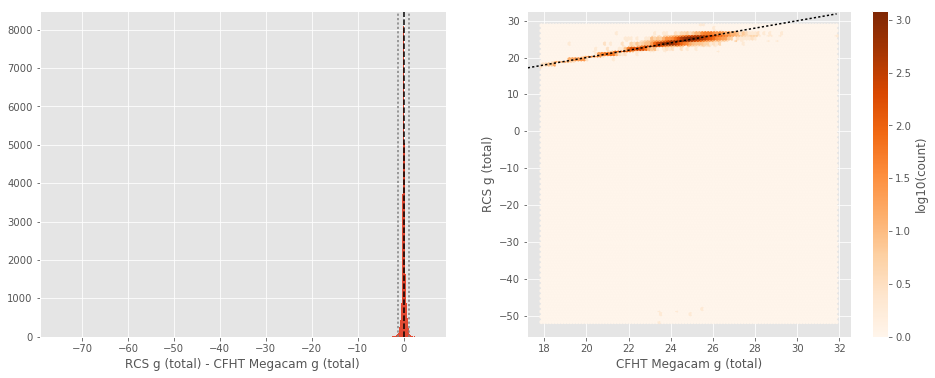

No aperture magnitudes in one or both bands.
RCS g (total) - GPC1 g (total):
- Median: -0.14
- Median Absolute Deviation: 0.14
- 1% percentile: -0.971689167022705
- 99% percentile: 1.1578411293029767


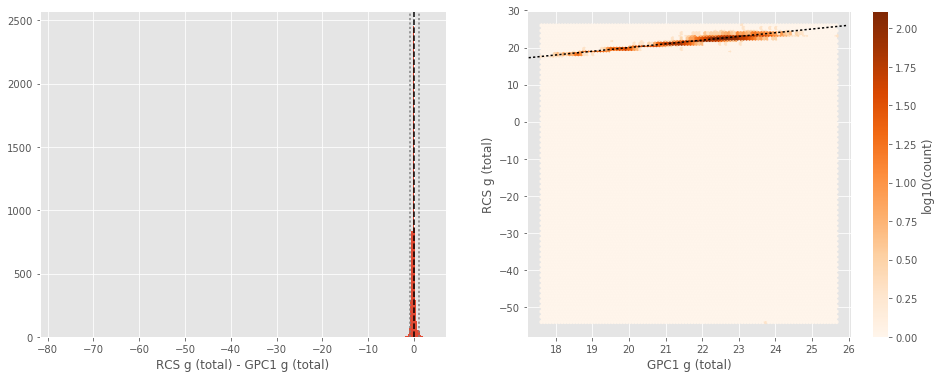

CFHT Megacam r (aperture) - WFC r (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.16
- 1% percentile: -0.7845287322998047
- 99% percentile: 1.7475967407226562


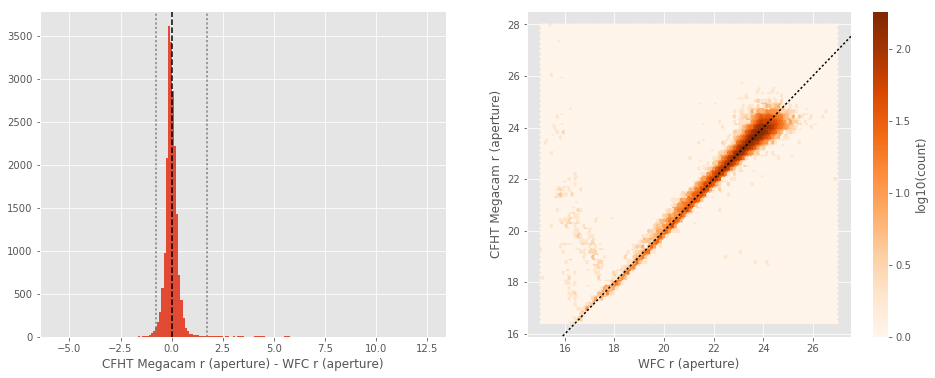

CFHT Megacam r (total) - WFC r (total):
- Median: -0.11
- Median Absolute Deviation: 0.14
- 1% percentile: -1.12176570892334
- 99% percentile: 2.289349632263184


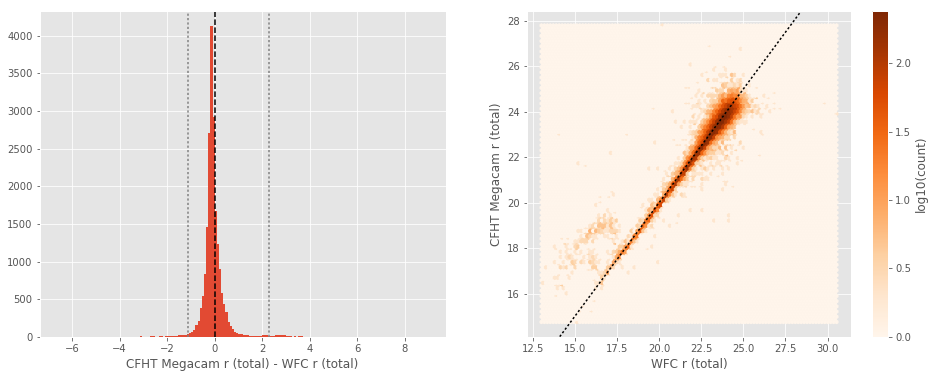

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.12
- 1% percentile: -1.060281753540039
- 99% percentile: 1.2858831405639648


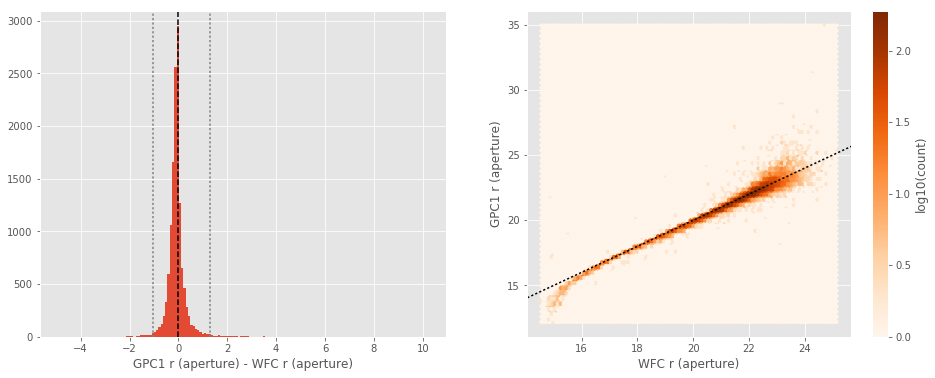

GPC1 r (total) - WFC r (total):
- Median: -0.00
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8407918167114257
- 99% percentile: 0.7846715545654296


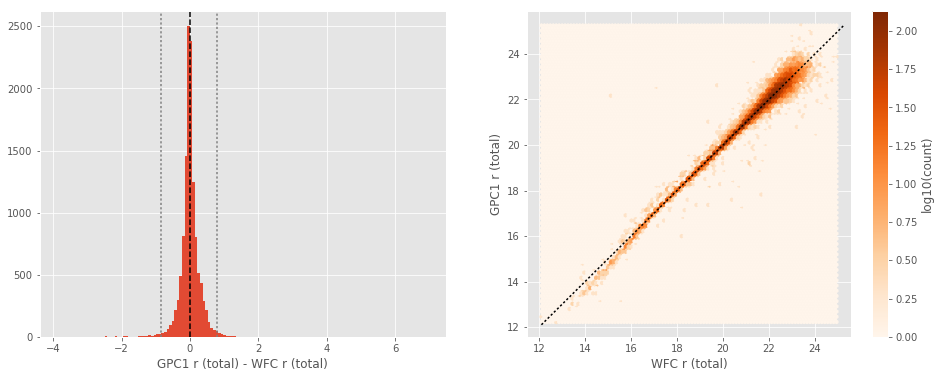

No aperture magnitudes in one or both bands.
RCS r (total) - WFC r (total):
- Median: -0.14
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1909399032592773
- 99% percentile: 1.081070041656491


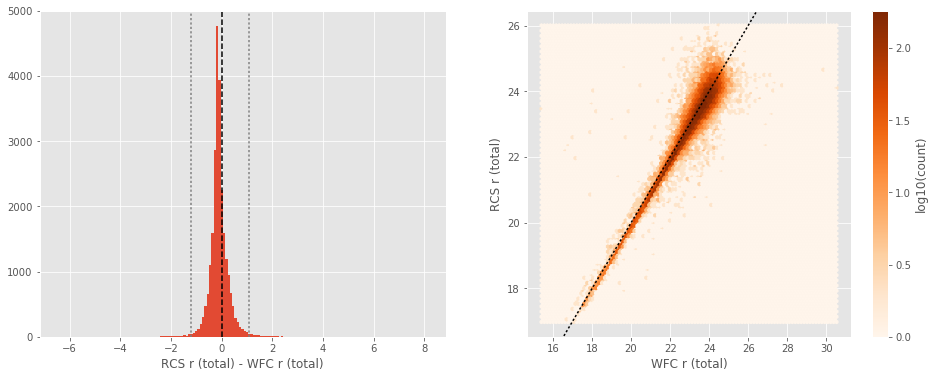

GPC1 r (aperture) - CFHT Megacam r (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.20
- 1% percentile: -4.1356661415100096
- 99% percentile: 1.3487873077392583


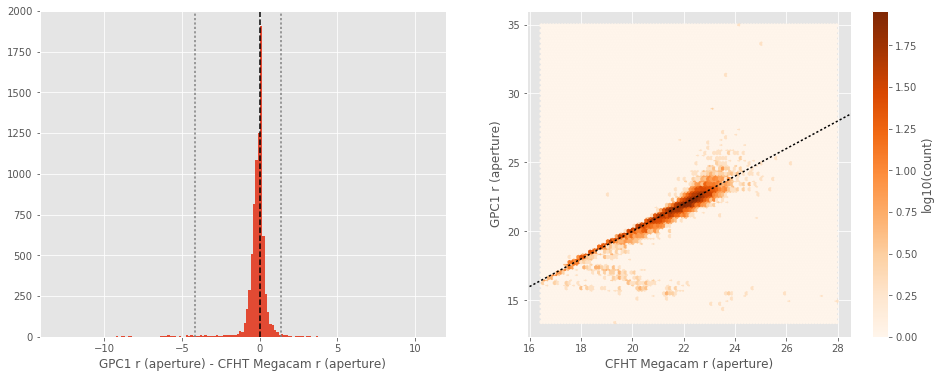

GPC1 r (total) - CFHT Megacam r (total):
- Median: 0.10
- Median Absolute Deviation: 0.10
- 1% percentile: -3.158449020385742
- 99% percentile: 0.8012936401367192


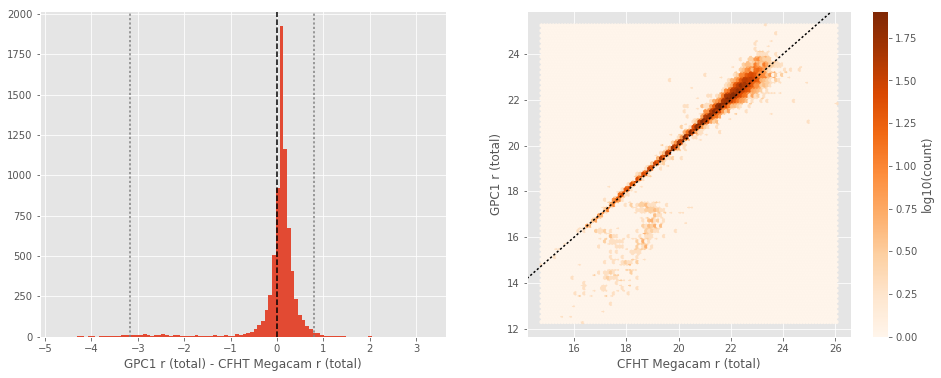

No aperture magnitudes in one or both bands.
RCS r (total) - CFHT Megacam r (total):
- Median: -0.02
- Median Absolute Deviation: 0.16
- 1% percentile: -1.1442737579345703
- 99% percentile: 1.1902351379394531


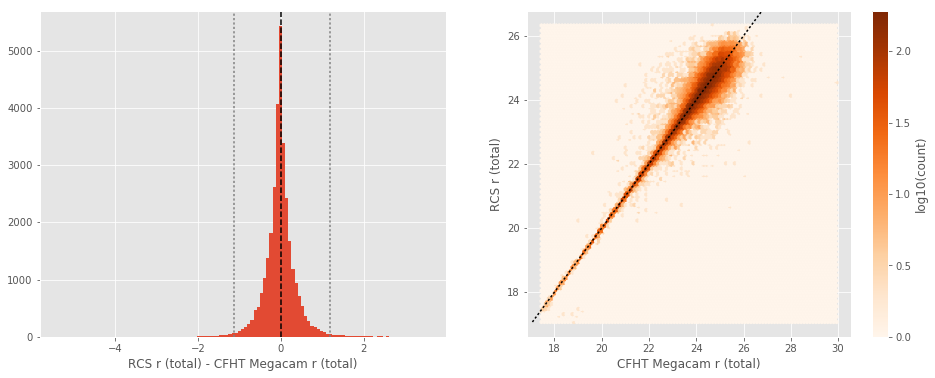

No aperture magnitudes in one or both bands.
RCS r (total) - GPC1 r (total):
- Median: -0.14
- Median Absolute Deviation: 0.09
- 1% percentile: -0.848475456237793
- 99% percentile: 0.5957260131835938


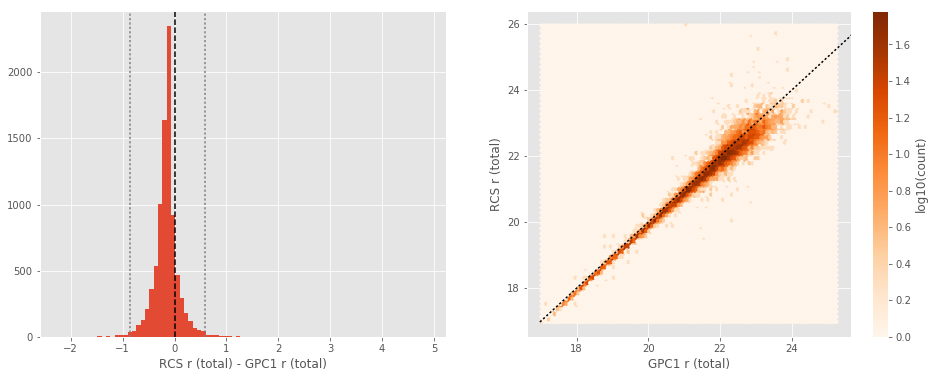

GPC1 i (aperture) - WFC i (aperture):
- Median: 0.00
- Median Absolute Deviation: 0.11
- 1% percentile: -0.7964646244049072
- 99% percentile: 0.9100483322143536


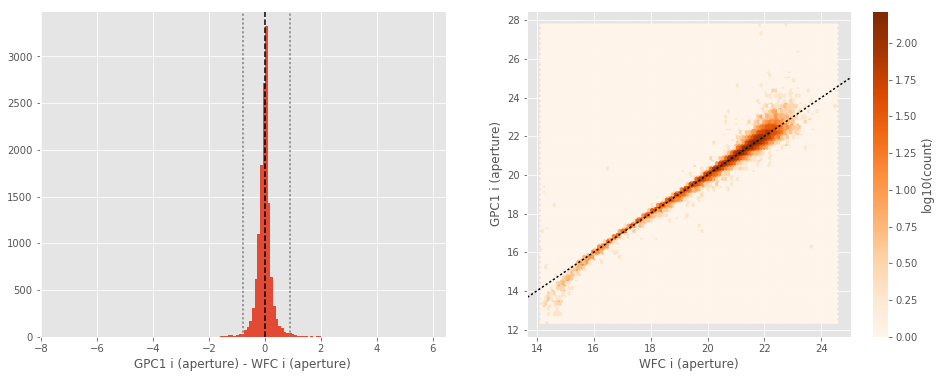

GPC1 i (total) - WFC i (total):
- Median: 0.07
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6286419677734375
- 99% percentile: 0.873689823150635


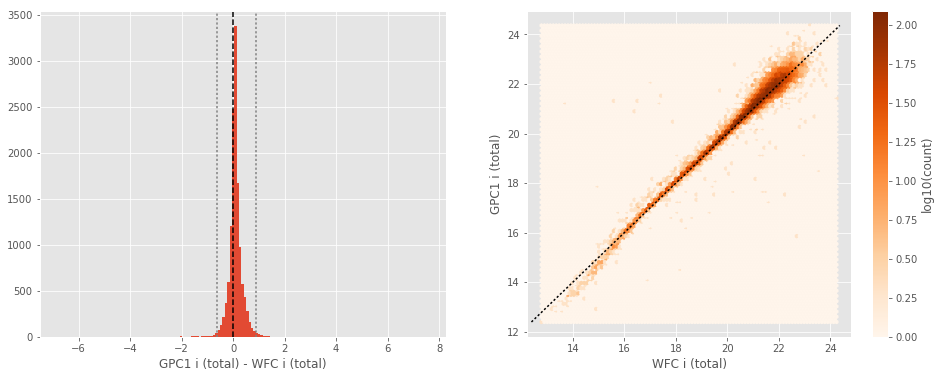

No aperture magnitudes in one or both bands.
RCS i (total) - WFC i (total):
- Median: -0.08
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0652801704406738
- 99% percentile: 1.4237103271484384


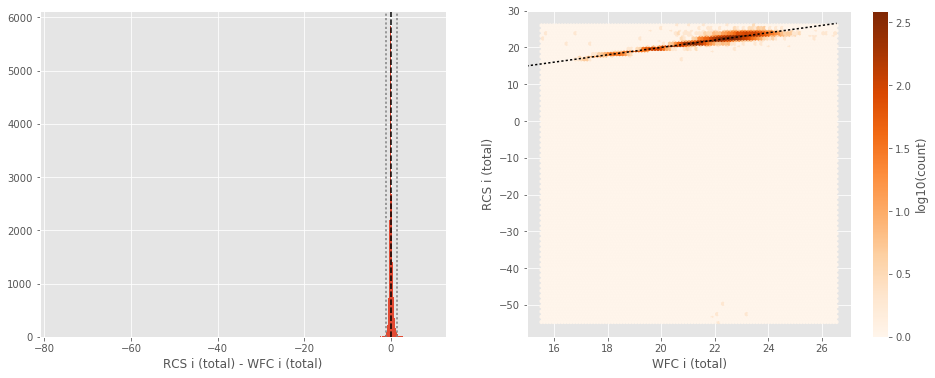

No aperture magnitudes in one or both bands.
RCS i (total) - GPC1 i (total):
- Median: -0.19
- Median Absolute Deviation: 0.09
- 1% percentile: -0.8302346801757812
- 99% percentile: 0.5118429183959962


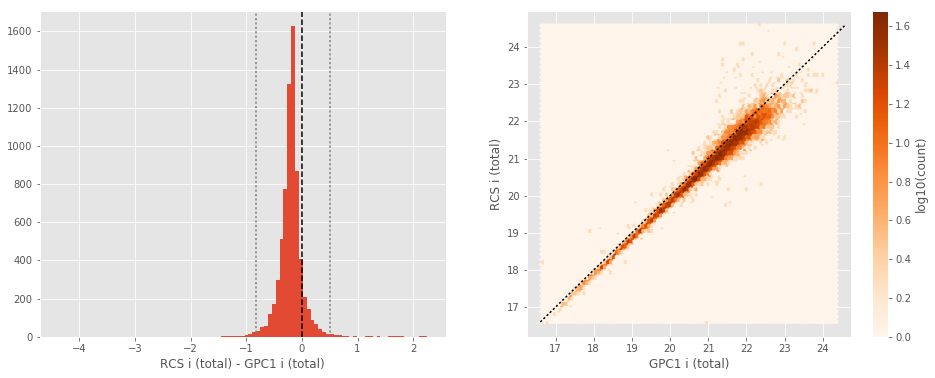

CFHT Megacam z (aperture) - WFC z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.15
- 1% percentile: -0.5779882431030274
- 99% percentile: 3.753044509887692


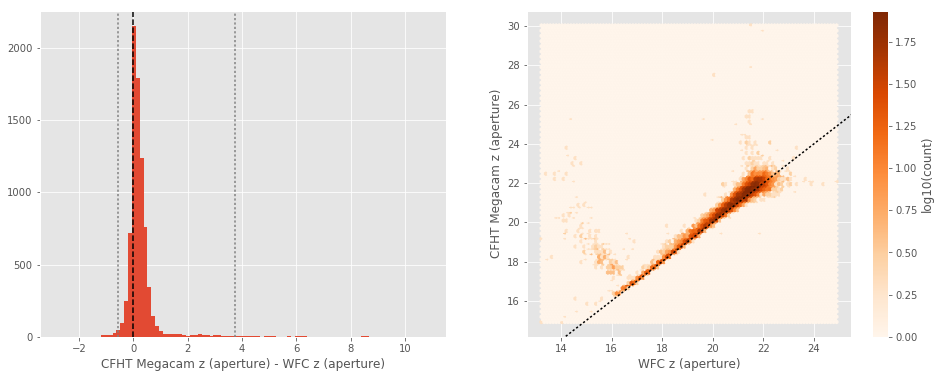

CFHT Megacam z (total) - WFC z (total):
- Median: -0.05
- Median Absolute Deviation: 0.18
- 1% percentile: -0.8581006622314453
- 99% percentile: 2.6105913829803473


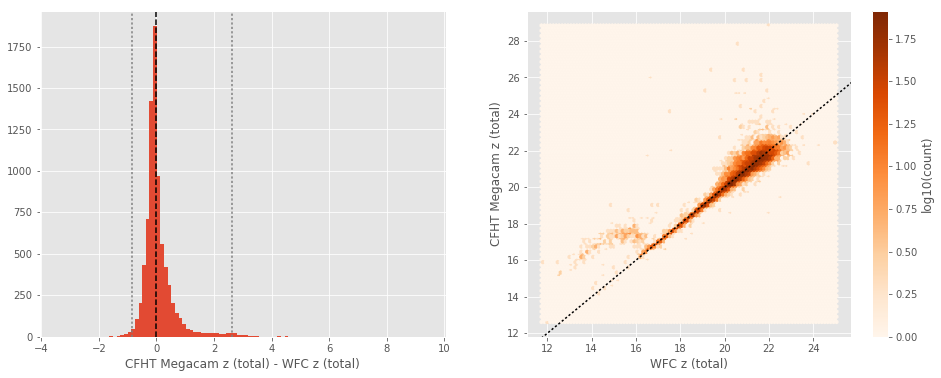

GPC1 z (aperture) - WFC z (aperture):
- Median: 0.05
- Median Absolute Deviation: 0.11
- 1% percentile: -0.7264391708374023
- 99% percentile: 1.0121294021606442


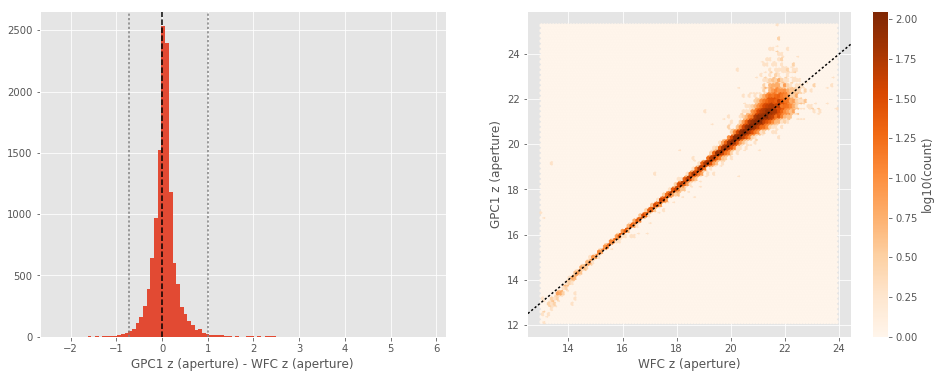

GPC1 z (total) - WFC z (total):
- Median: 0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -0.7497785949707031
- 99% percentile: 1.1819754409790049


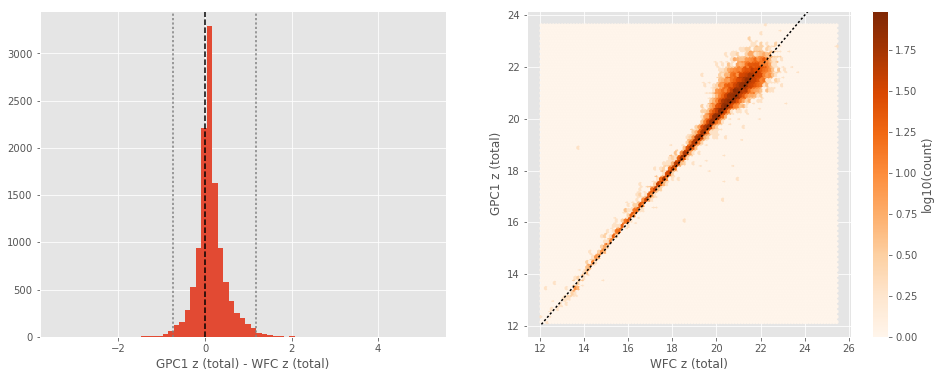

No aperture magnitudes in one or both bands.
RCS z (total) - WFC z (total):
- Median: -0.06
- Median Absolute Deviation: 0.20
- 1% percentile: -0.99884033203125
- 99% percentile: 1.4305404663085932


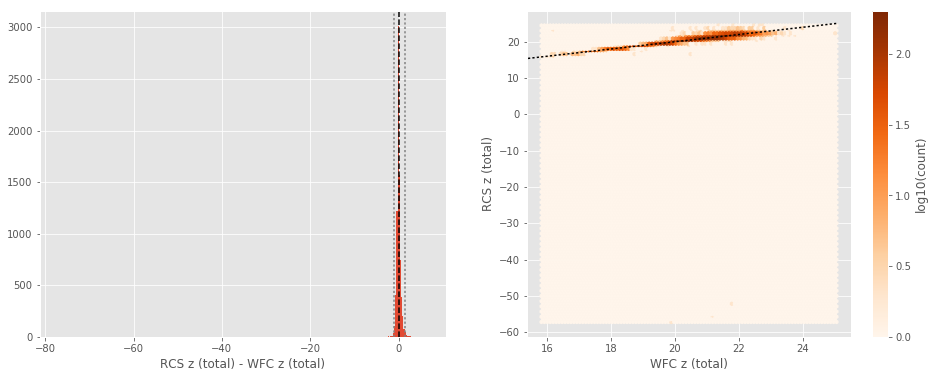

GPC1 z (aperture) - CFHT Megacam z (aperture):
- Median: -0.05
- Median Absolute Deviation: 0.17
- 1% percentile: -3.8294356346130374
- 99% percentile: 1.1702493476867666


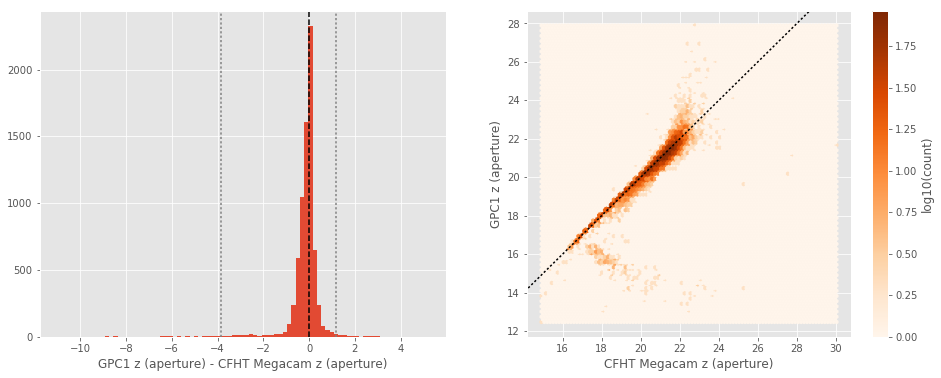

GPC1 z (total) - CFHT Megacam z (total):
- Median: 0.17
- Median Absolute Deviation: 0.10
- 1% percentile: -2.612646198272705
- 99% percentile: 0.8133419036865238


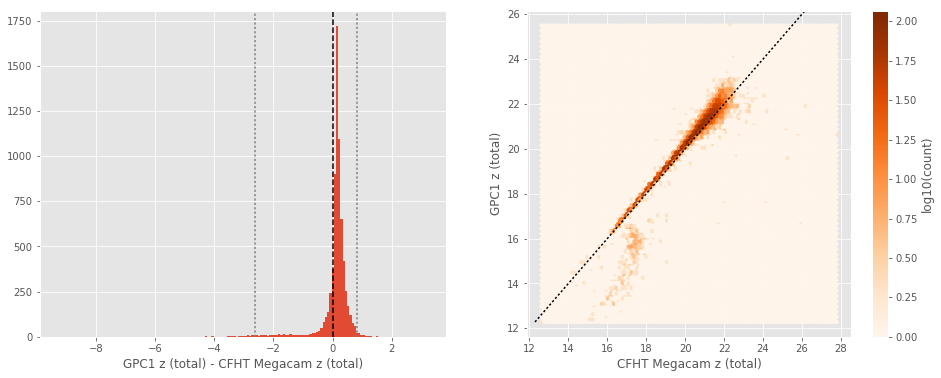

No aperture magnitudes in one or both bands.
RCS z (total) - CFHT Megacam z (total):
- Median: -0.03
- Median Absolute Deviation: 0.25
- 1% percentile: -2.4517782592773436
- 99% percentile: 1.301009559631347


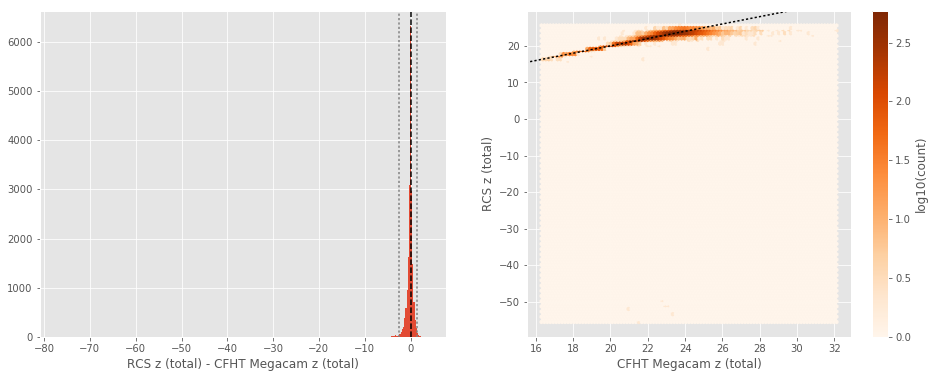

No aperture magnitudes in one or both bands.
RCS z (total) - GPC1 z (total):
- Median: -0.19
- Median Absolute Deviation: 0.11
- 1% percentile: -0.940716552734375
- 99% percentile: 0.6241260528564443


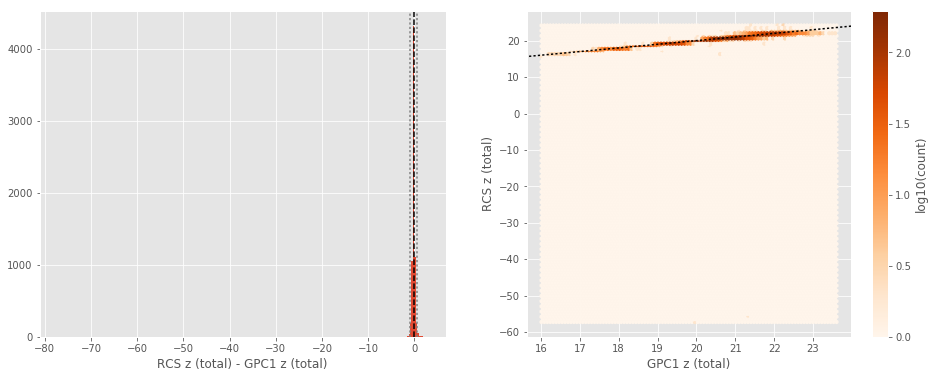

No aperture magnitudes in one or both bands.
No aperture magnitudes in one or both bands.


In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS magnitudes.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [13]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_ELAIS-N2.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.19
- 1% percentile: -1.5080882835388185
- 99% percentile: 0.9397666168212868


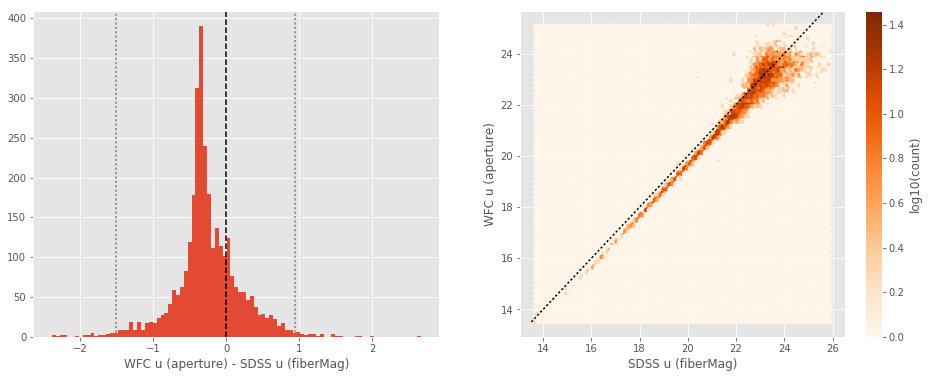

WFC u (total) - SDSS u (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.19
- 1% percentile: -1.5080882835388185
- 99% percentile: 0.9397666168212868


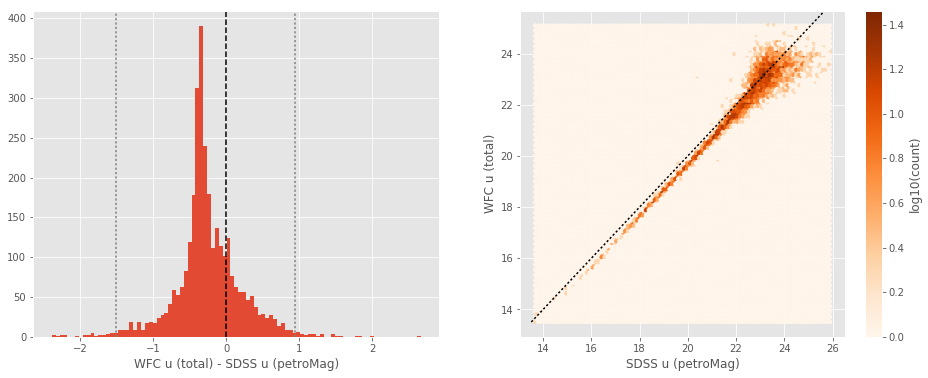

CFHT Megacam u (aperture) - SDSS u (fiberMag):
- Median: -0.01
- Median Absolute Deviation: 0.57
- 1% percentile: -1.7301750183105469
- 99% percentile: 3.1626298904418806


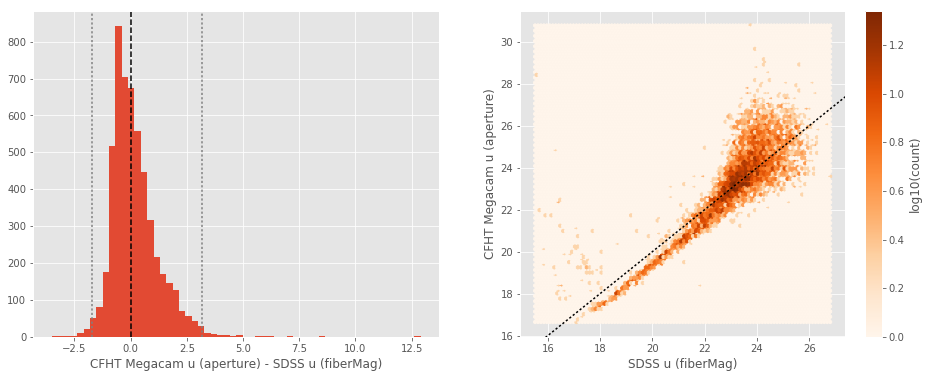

CFHT Megacam u (total) - SDSS u (petroMag):
- Median: -0.01
- Median Absolute Deviation: 0.57
- 1% percentile: -1.7301750183105469
- 99% percentile: 3.1626298904418806


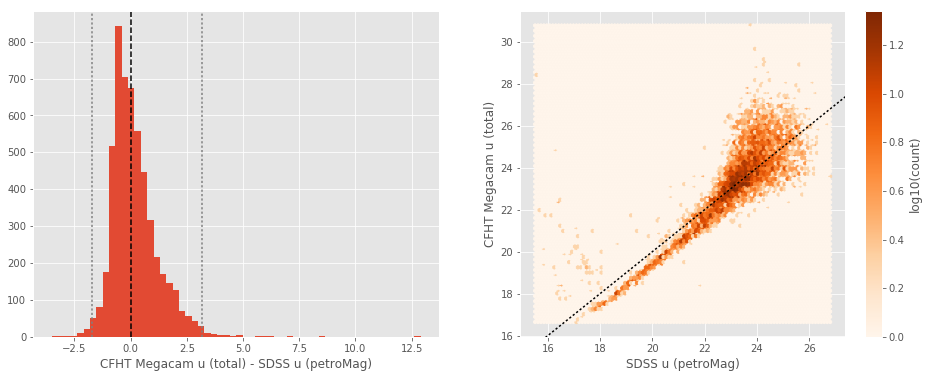

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -1.2066106033325195
- 99% percentile: 0.6048369598388658


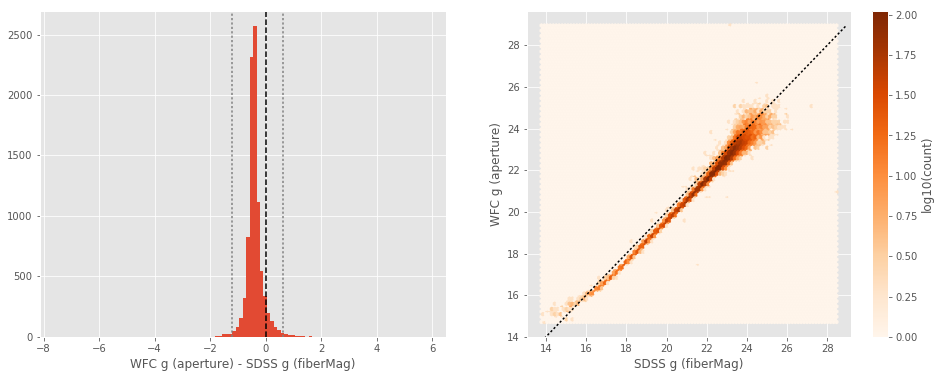

WFC g (total) - SDSS g (petroMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -1.2066106033325195
- 99% percentile: 0.6048369598388658


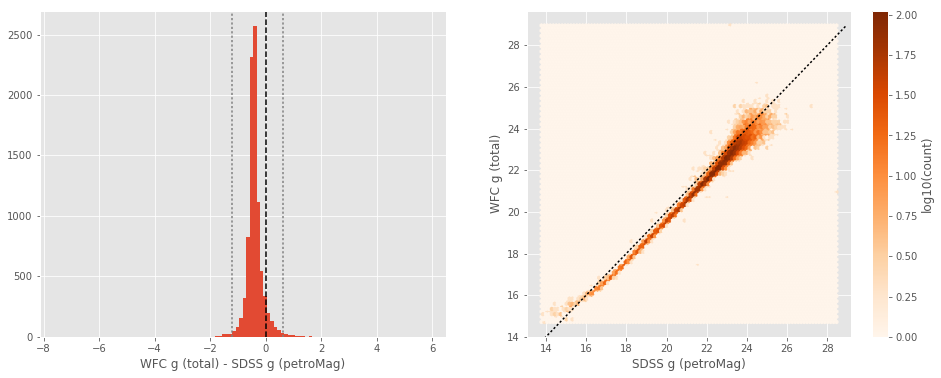

CFHT Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.44
- Median Absolute Deviation: 0.18
- 1% percentile: -1.2357501983642578
- 99% percentile: 3.724156723022442


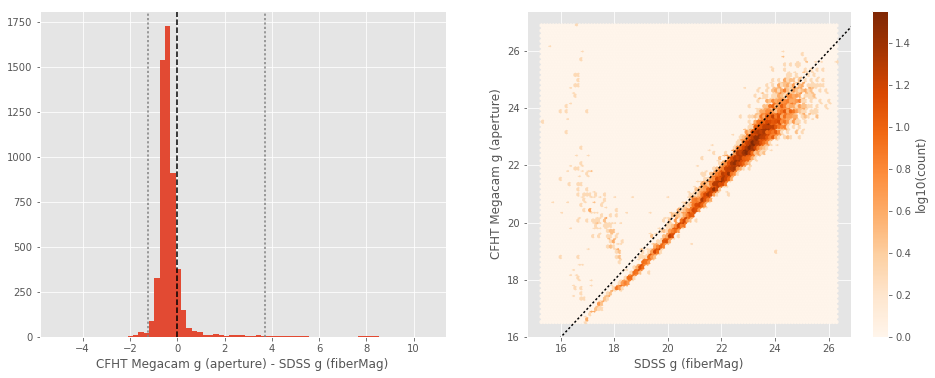

CFHT Megacam g (total) - SDSS g (petroMag):
- Median: -0.44
- Median Absolute Deviation: 0.18
- 1% percentile: -1.2357501983642578
- 99% percentile: 3.724156723022442


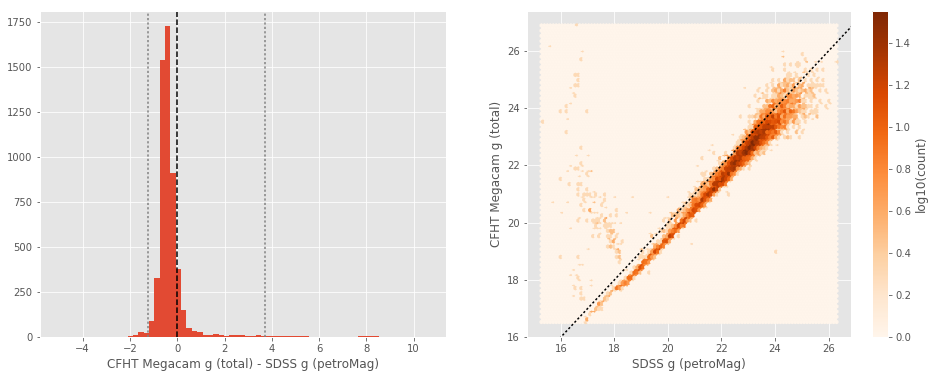

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.49
- Median Absolute Deviation: 0.19
- 1% percentile: -1.7262804031372068
- 99% percentile: 1.7591300964355445


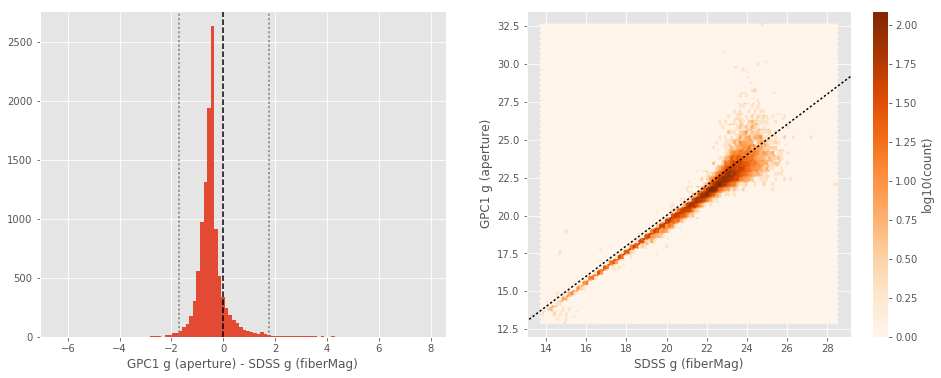

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.49
- Median Absolute Deviation: 0.19
- 1% percentile: -1.7262804031372068
- 99% percentile: 1.7591300964355445


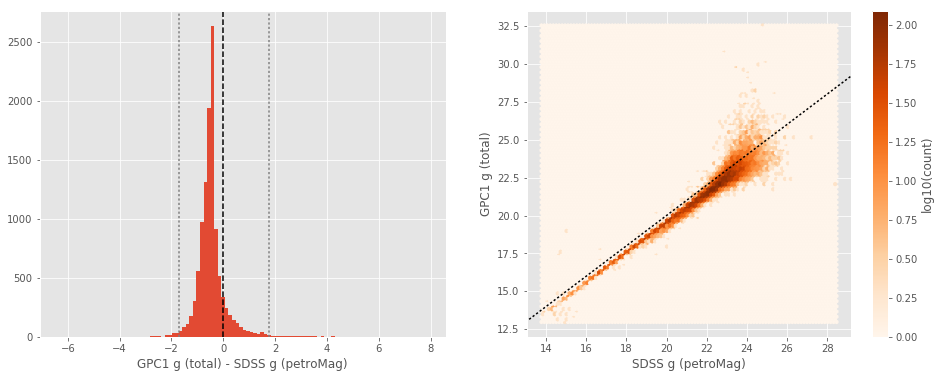

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No aperture magnitudes in one or both bands.
No aperture magnitudes in one or both bands.
WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.32
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8577423858642578
- 99% percentile: 0.3936159515380845


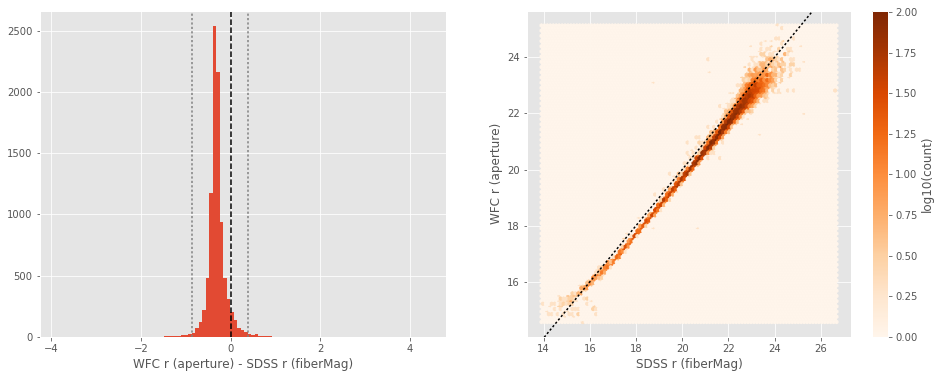

WFC r (total) - SDSS r (petroMag):
- Median: -0.32
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8577423858642578
- 99% percentile: 0.3936159515380845


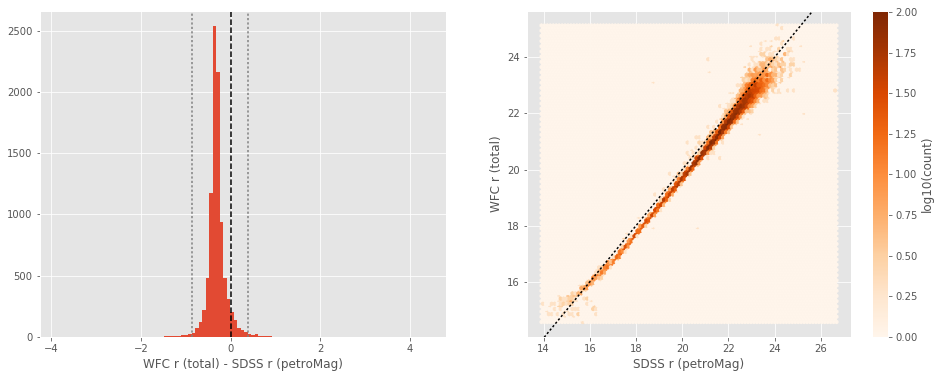

CFHT Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9398679733276367
- 99% percentile: 4.186496181488041


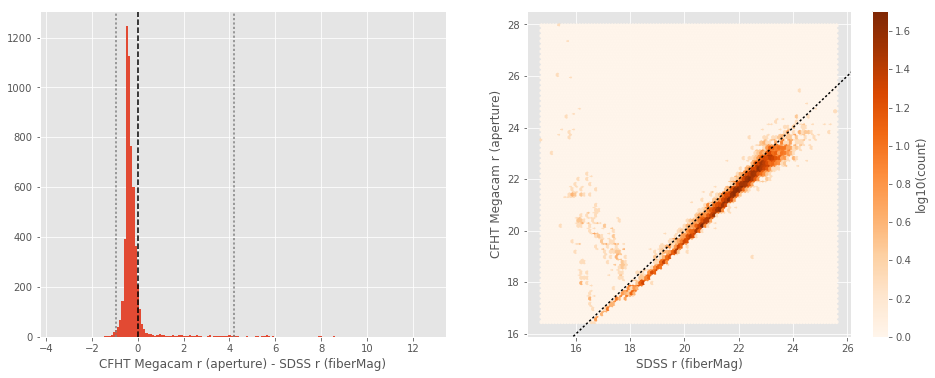

CFHT Megacam r (total) - SDSS r (petroMag):
- Median: -0.36
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9398679733276367
- 99% percentile: 4.186496181488041


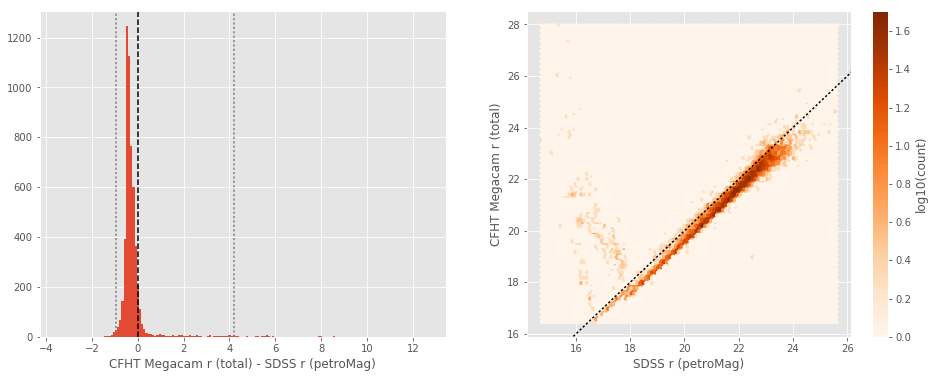

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.11
- 1% percentile: -1.198985233306885
- 99% percentile: 0.695460929870605


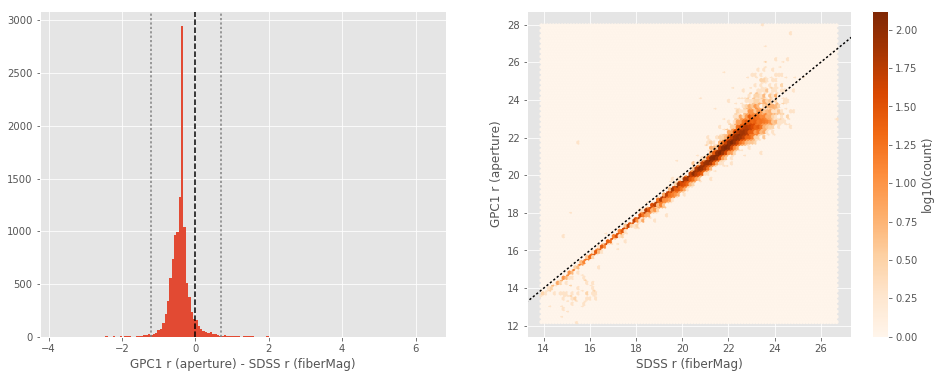

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.38
- Median Absolute Deviation: 0.11
- 1% percentile: -1.198985233306885
- 99% percentile: 0.695460929870605


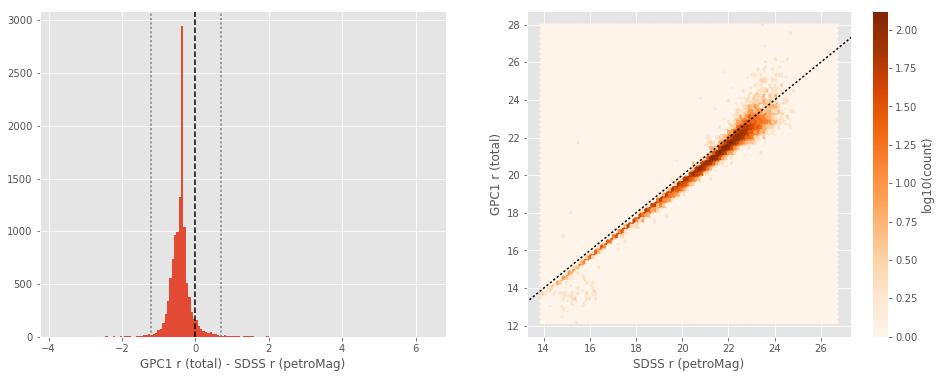

No aperture magnitudes in one or both bands.
No aperture magnitudes in one or both bands.
WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.40
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9146337890625
- 99% percentile: 0.36798225402831897


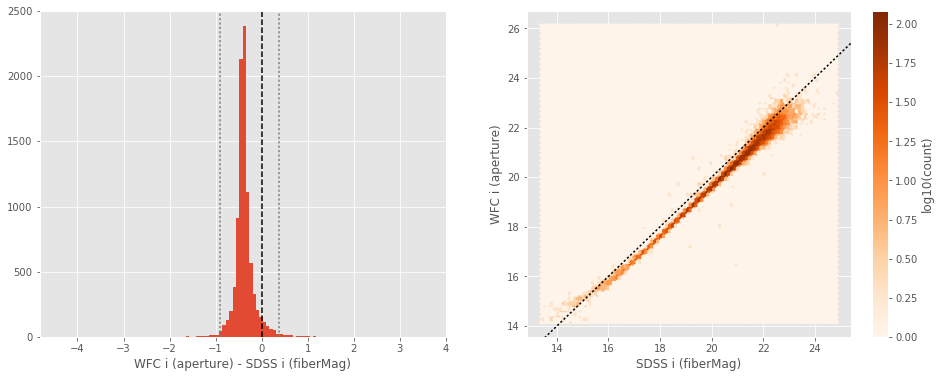

WFC i (total) - SDSS i (petroMag):
- Median: -0.40
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9146337890625
- 99% percentile: 0.36798225402831897


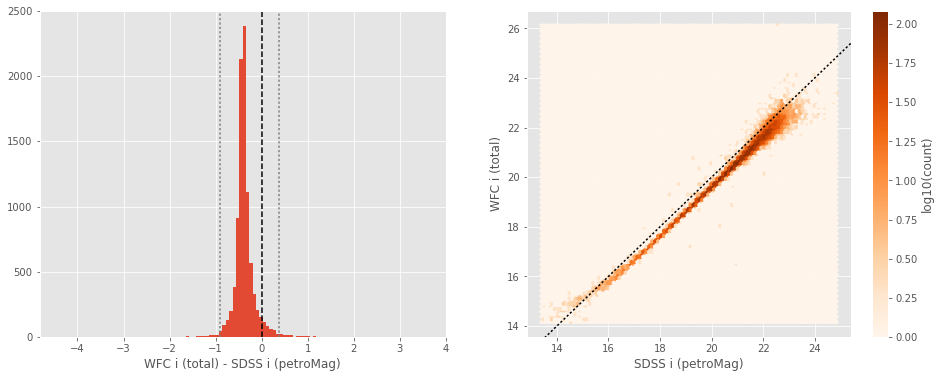

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.37
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9705064773559571
- 99% percentile: 0.406497764587403


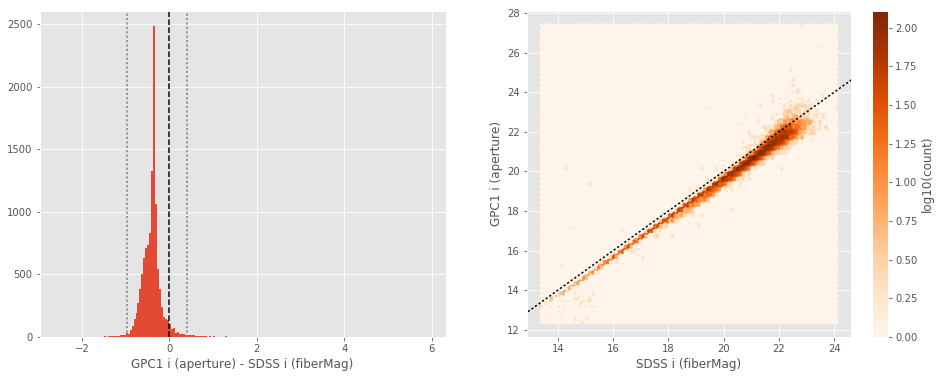

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.37
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9705064773559571
- 99% percentile: 0.406497764587403


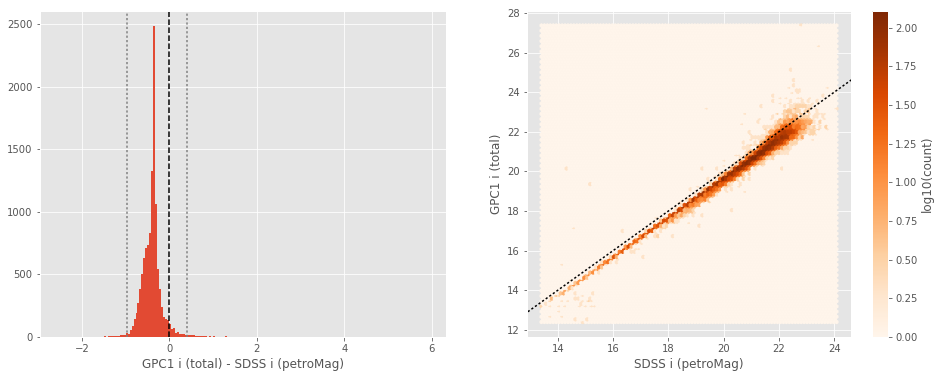

No aperture magnitudes in one or both bands.
No aperture magnitudes in one or both bands.
WFC z (aperture) - SDSS z (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.10
- 1% percentile: -1.0854340362548829
- 99% percentile: 0.6038125228881829


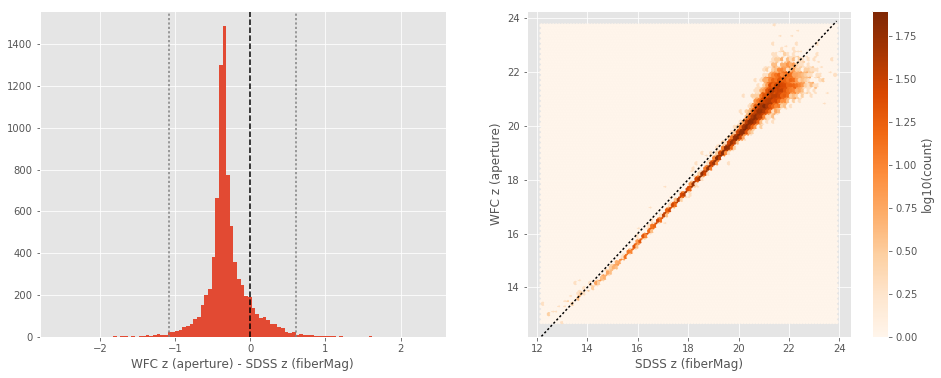

WFC z (total) - SDSS z (petroMag):
- Median: -0.35
- Median Absolute Deviation: 0.10
- 1% percentile: -1.0854340362548829
- 99% percentile: 0.6038125228881829


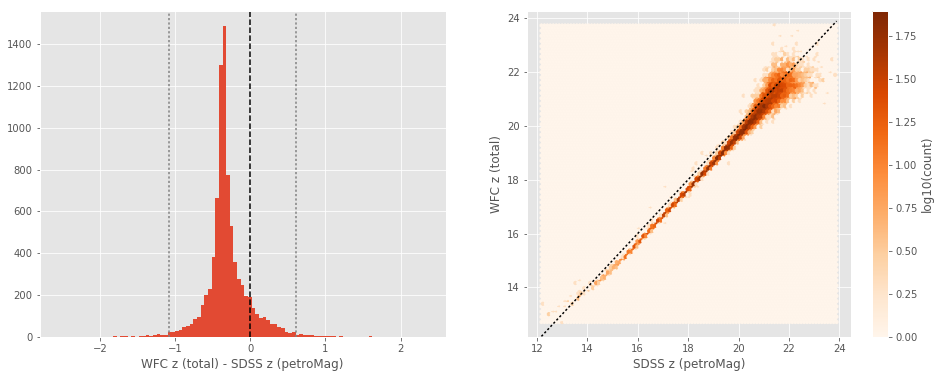

CFHT Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9547021484375
- 99% percentile: 3.3593647384643663


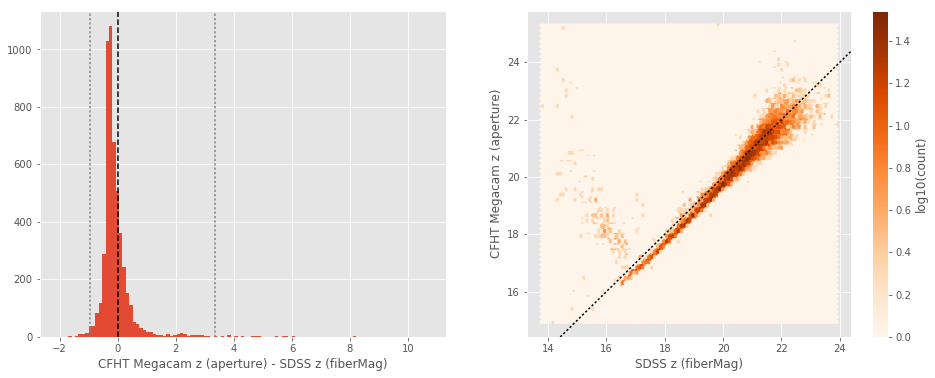

CFHT Megacam z (total) - SDSS z (petroMag):
- Median: -0.21
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9547021484375
- 99% percentile: 3.3593647384643663


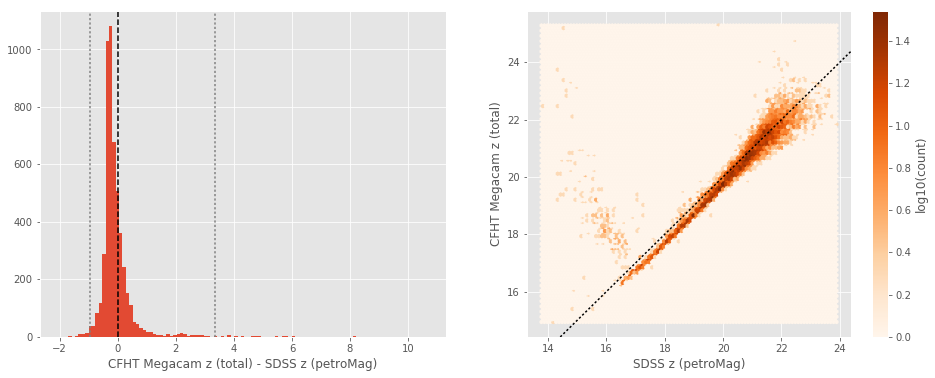

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0709292221069338
- 99% percentile: 0.9556843185424795


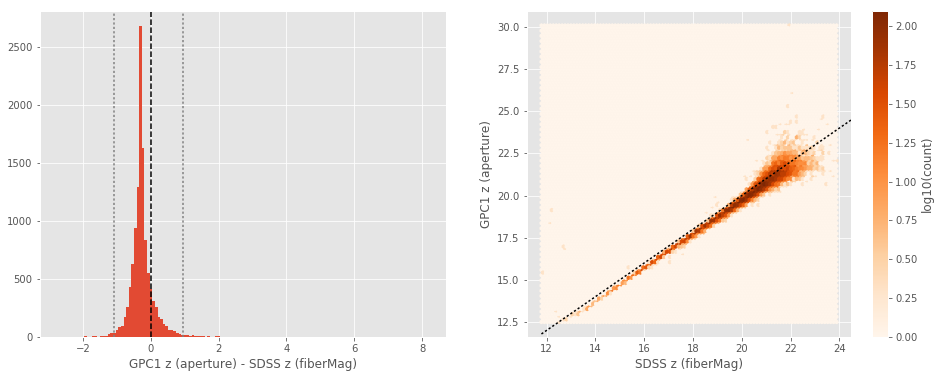

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.29
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0709292221069338
- 99% percentile: 0.9556843185424795


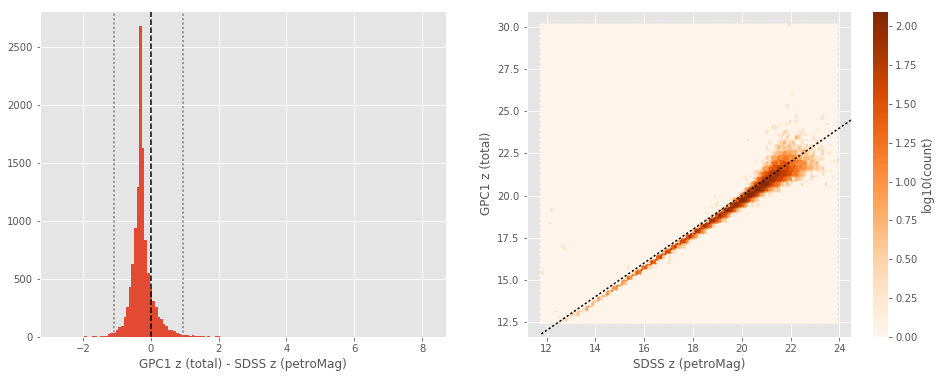

No aperture magnitudes in one or both bands.
No aperture magnitudes in one or both bands.


In [14]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 55215 / 138907 (39.75%)


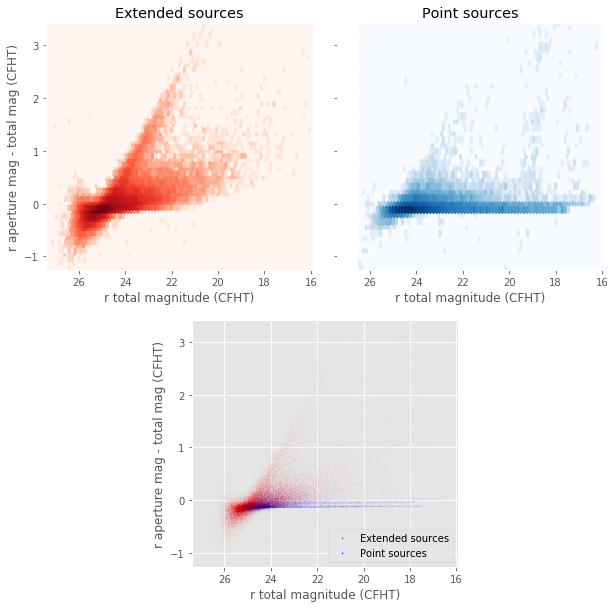

In [18]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_r'],
    master_catalogue['m_ap_cfht_megacam_r'] - master_catalogue['m_cfht_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 8680 / 138907 (6.25%)


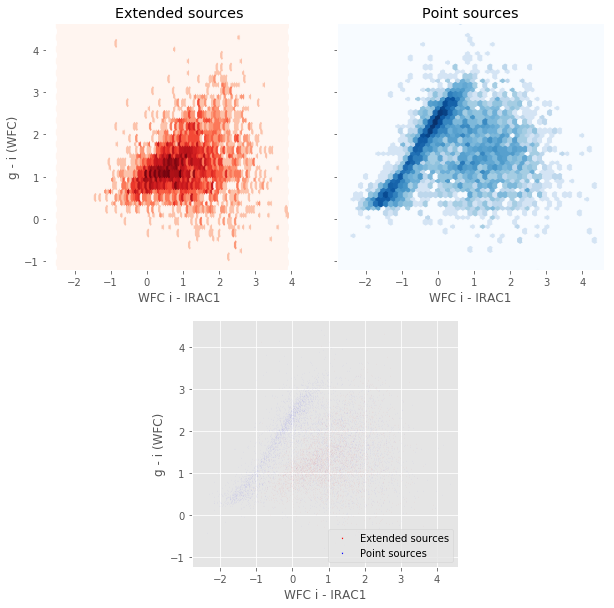

In [20]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_swire_irac1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 51582 / 138907 (37.13%)


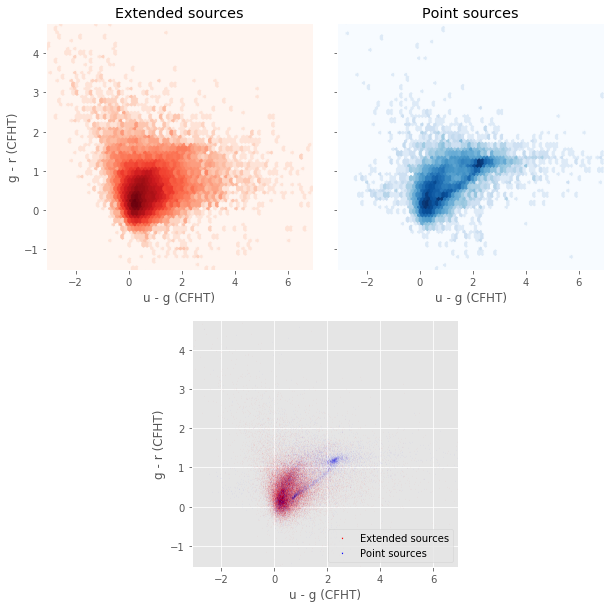

In [21]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_u'] - master_catalogue['m_cfht_megacam_g'],
    master_catalogue['m_cfht_megacam_g'] - master_catalogue['m_cfht_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 1639 / 138907 (1.18%)


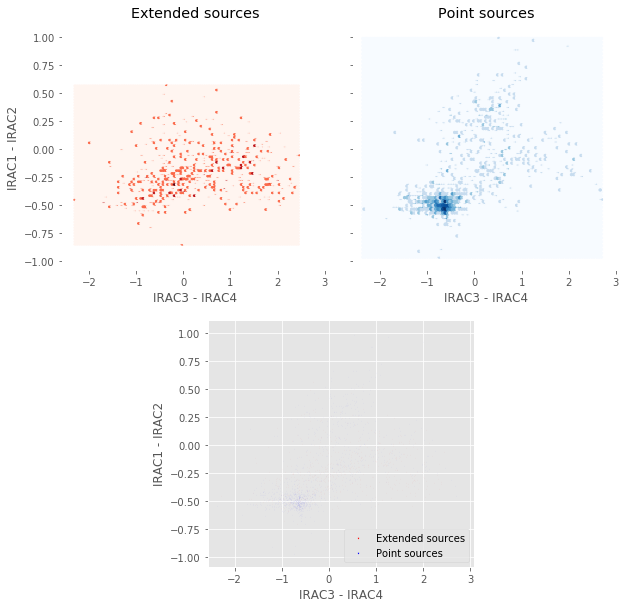

In [23]:
nb_ccplots(
    master_catalogue['m_irac3'] - master_catalogue['m_irac4'],
    master_catalogue['m_swire_irac1'] - master_catalogue['m_swire_irac2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)